<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/earthEngine_ejemplo_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar módulo

In [0]:
import ee

Autentificar 

In [353]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=CoelqnfIhw0NrXD6A4feLymY7g86M9Zpr47F4bw3QkQ&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/yQEQ6TeT69o1BPD89ilQNslR-joSQDvT86-nVFkA92I1rYnhDsEq4BQ

Successfully saved authorization token.


Inicializar

In [0]:
ee.Initialize()

Colección de datos

In [355]:
coleccion1 = ee.ImageCollection("LANDSAT/LT05/C01/T1")
type(coleccion)

ee.imagecollection.ImageCollection

Info

In [356]:
#print(coleccion)
print('Numero de imagenes:',coleccion1.size().getInfo())

Numero de imagenes: 1657430


Filtro tiempo

In [357]:
fechaMin = "2008-01-01"
fechaMax = "2008-06-01"
coleccion2 = coleccion1.filterDate(fechaMin,fechaMax)
print('Numero de imagenes:',coleccion2.size().getInfo())

Numero de imagenes: 20180


Filtro geometrico

In [358]:
xMin= -100
xMax = -98
yMin = 18
yMax = 20

area = ee.Geometry.Rectangle([xMin,yMin,xMax,yMax],proj='EPSG:4326')
coleccion3 = coleccion2.filterBounds(area)
print('Numero de imagenes:',coleccion3.size().getInfo())

Numero de imagenes: 6


Metadato

In [359]:
coleccion3.first().getInfo()

{'bands': [{'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 402285, 0, -30, 2341515],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'dimensions': [7861, 6971],
   'id': 'B1'},
  {'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 402285, 0, -30, 2341515],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'dimensions': [7861, 6971],
   'id': 'B2'},
  {'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 402285, 0, -30, 2341515],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'dimensions': [7861, 6971],
   'id': 'B3'},
  {'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 402285, 0, -30, 2341515],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'dimensions': [7861, 6971],
   'id': 'B4'},
  {'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 402285, 0, -30, 2341515],
   'data_type': {'max': 255,
    'min': 0

Filtro metadata


In [360]:
nubes = 0
coleccion4 = coleccion3.filterMetadata("CLOUD_COVER_LAND","less_than",nubes)
coleccion4 = coleccion3.filterMetadata("WRS_ROW",'equals',46)
coleccion4 = coleccion3.filterMetadata("WRS_PATH",'equals',26)
print('Numero de imagenes:',coleccion4.size().getInfo())

Numero de imagenes: 3


Bandas

In [361]:
coleccion5 = coleccion4.select(['B4'])
image = coleccion5.first()
image

Recorte

In [0]:
xMin= -98.95
xMax = -98.9
yMin = 19.55
yMax = 19.6

area2 = ee.Geometry.Rectangle([xMin,yMin,xMax,yMax],proj='EPSG:4326')

Descarga

In [0]:
task = ee.batch.Export.image.toDrive(**{
        'image' : image, 
        'description' : 'PRUEBAB4',
        'scale': 30,
        'region': area2})
task.start()

In [365]:
path = image.getDownloadUrl({
'region': area2
})
print (path)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/1cf5cec5cb775b9312570efc76cf8167-c5fde76faa7e68e6f13d1b7810927994:getPixels


Tratamiento 

Apertura

In [0]:
from osgeo import gdal
ds = gdal.Open('/content/drive/My Drive/PRUEBAB4.tif')

Extracción

In [0]:
b4 = ds.ReadAsArray()

Graficación

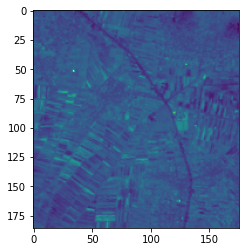

In [368]:
import matplotlib.pyplot as plt
plt.imshow(b4)

Cálculo NDVI

Banda 3

In [0]:
coleccion5 = coleccion4.select(['B3'])
image = coleccion5.first()
image
task = ee.batch.Export.image.toDrive(**{
        'image' : image, 
        'description' : 'PRUEBAB3',
        'scale': 30,
        'region': area2})
task.start()

Apertura y extracción

In [0]:
from osgeo import gdal
ds = gdal.Open('/content/drive/My Drive/PRUEBAB3.tif')
b3 = ds.ReadAsArray()

NDVI

In [374]:
ndvi = (b4-b3)/(b4+b3)
ndvi

array([[0.11888112, 0.07801418, 0.05555556, ..., 0.04242424, 0.06493506,
        0.05806452],
       [0.09210526, 0.06293706, 0.07913669, ..., 0.06329114, 0.09433962,
        0.07317073],
       [0.11538462, 0.05960265, 0.06944444, ..., 0.04819277, 0.08536585,
        0.08536585],
       ...,
       [0.01714286, 0.03571429, 0.01818182, ..., 0.1023622 , 0.11278195,
        0.19736842],
       [0.03030303, 0.04294479, 0.03703704, ..., 0.13432836, 0.11450382,
        0.21804511],
       [0.03846154, 0.03797468, 0.05960265, ..., 0.20325203, 0.15044248,
        0.2       ]])

Graficación

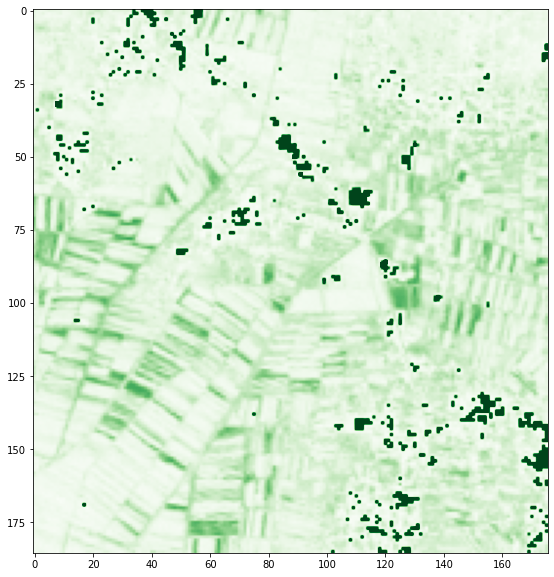

In [375]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(ndvi,cmap='Greens',vmin=0,vmax=1)

#FOLIUM

In [0]:
import os
import folium

In [0]:
map = folium.Map([37, 0], zoom_start=1, tiles='stamentoner')
merc = os.path.join('', '/content/drive/My Drive/PRUEBA.tif')

if not os.path.isfile(merc):
    print(f'Could not find {merc}')
else:
    img = folium.raster_layers.ImageOverlay(
        name='Mercator projection SW',
        image=merc,
        bounds=[[-82, -180], [82, 180]],
        opacity=0.9,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )

    folium.Popup('I am an image').add_to(img)

    img.add_to(map)
    folium.LayerControl().add_to(m)
    map.save(os.path.join('', 'ImageOverlay_0.html'))



Could not find /content/drive/My Drive/PRUEBA.tif
